In [99]:
import pandas as pd
import sqlite3


norm_db=sqlite3.connect("fdwatch.o.db")
obf_db=sqlite3.connect("fdwatch_dot_o_268_727_2.71.db")

#Program Tables
norm_program=pd.read_sql_query("SELECT * FROM PROGRAM",norm_db)
obf_program=pd.read_sql_query("SELECT * FROM PROGRAM", obf_db)

#Function Tables
norm_func=pd.read_sql_query("SELECT * FROM FUNCTION",norm_db)
obf_func=pd.read_sql_query("SELECT * FROM FUNCTION", obf_db)

#Block Tables
norm_blk=pd.read_sql_query("SELECT * FROM BLOCK",norm_db)
obf_blk=pd.read_sql_query("SELECT * FROM BLOCK", obf_db)

#Instruction Tables
norm_inst=pd.read_sql_query("SELECT * FROM INSTRUCTION",norm_db)
obf_inst=pd.read_sql_query("SELECT * FROM INSTRUCTION", obf_db)

obf_program


,id,name,llvm_blocks,llvm_instructions,average_instructions,entropy,raw_hex,size
0,1,fdwatch_dot_o_268_727_2.71,268,727,2.71,3.509728,./processed_files/fdwatch_dot_o_268_727_2.71.hex,6334.0


In [2]:
prog_cmp = norm_program.append(obf_program)
prog_cmp[["name", "entropy", "size"]]

,name,entropy,size
0,fdwatch.o,3.082849,3120.0
0,fdwatch_dot_o_268_727_2.71,3.509728,6334.0


Performance is not even worth mentioning unless LLVM blocks are set at 10 instructions.


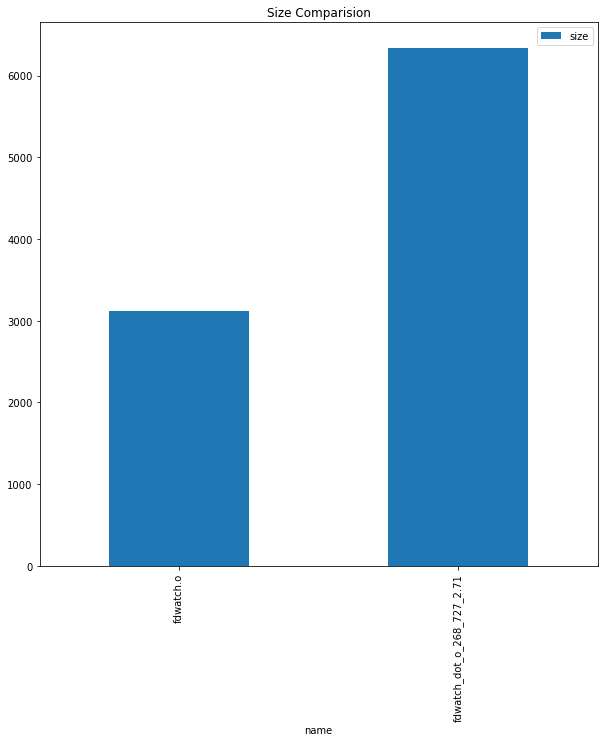

In [34]:
plt = prog_cmp.plot.bar(x="name", y="size", title="Size Comparision", figsize=(10, 10))
print("Performance is not even worth mentioning unless LLVM blocks are set at 10 instructions.")

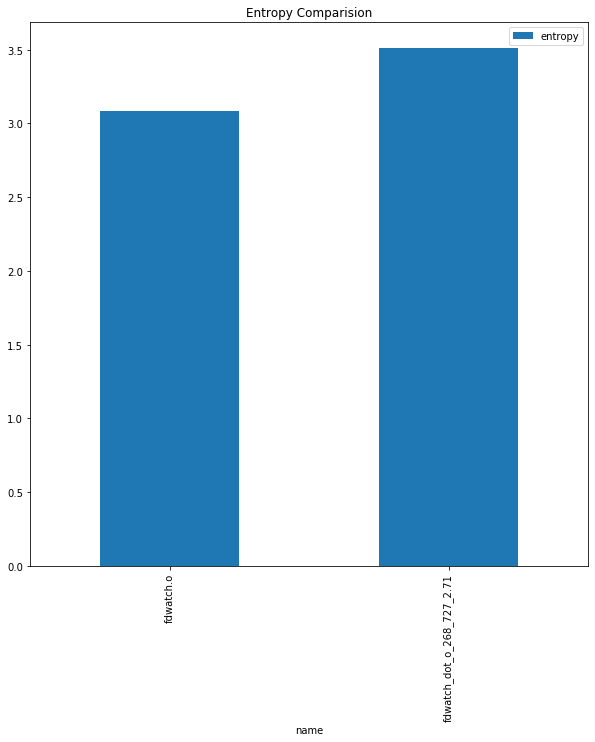

In [35]:
plt = prog_cmp.plot.bar(x="name", y="entropy", title="Entropy Comparision", figsize=(10, 10))

In [5]:
print(f"Obfuscated LLVM Instructions: {obf_program.llvm_instructions.values[0]}\n\
Obfuscated x86 Instruction Count: {obf_func.instruction_count.sum()}\n\
Normal x86 Instruction Count: {norm_func.instruction_count.sum()}")


Obfuscated LLVM Instructions: 727
Obfuscated x86 Instruction Count: 1271
Normal x86 Instruction Count: 509


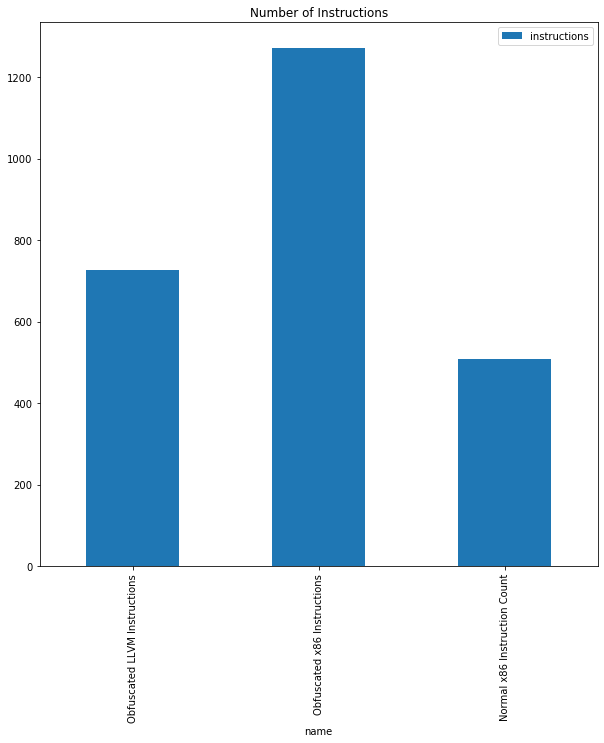

In [36]:
instructions = {"name": ["Obfuscated LLVM Instructions", "Obfuscated x86 Instructions", "Normal x86 Instruction Count"],
                "instructions": [obf_program.llvm_instructions.values[0], obf_func.instruction_count.sum(), norm_func.instruction_count.sum()]
               }
frame = pd.DataFrame(instructions)
plt = frame.plot.bar(x="name", y="instructions", title="Number of Instructions", figsize=(10, 10))

In [108]:
#Average instruction count
print(f"LLVM Average: {obf_program.average_instructions.values[0]}")
print(f"Obfuscated Average: {round(obf_func.instruction_count.sum() / obf_func.blocks.sum(),2)}")
print(f"Normal Average: {round(norm_func.instruction_count.sum() / norm_func.blocks.sum(),2)}")

LLVM Average: 2.71
Obfuscated Average: 4.28
Normal Average: 5.99


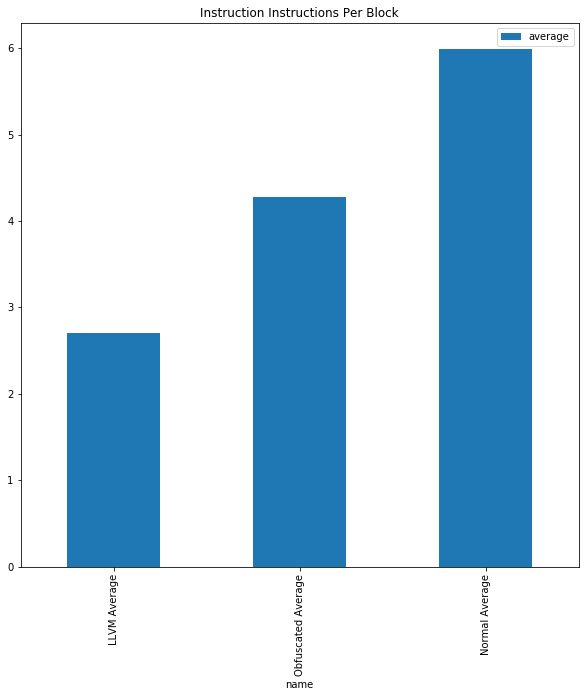

In [51]:
instructions = {"name": ["LLVM Average", "Obfuscated Average", "Normal Average"],
                "average": [obf_program.average_instructions.values[0], 
                          obf_func.instruction_count.sum() / obf_func.blocks.sum(),
                          norm_func.instruction_count.sum() / norm_func.blocks.sum()]
               }
frame = pd.DataFrame(instructions)
plt = frame.plot.bar(x="name", 
                     y="average", 
                     title="Instruction Instructions Per Block", 
                     figsize=(10, 10))

In [109]:
print(f"Noamral Program\n\nTotal Instructions: {norm_func.instruction_count.sum()}\n\
Jump Instructions: {norm_func.jump_count.sum()}\n\
Percent: {round(100*(norm_func.jump_count.sum() / norm_func.instruction_count.sum()), 2)}%")

norm_func.instruction_count

Noamral Program

Total Instructions: 509
Jump Instructions: 73
Percent: 14.34%


0     71
1     48
2     36
3     46
4     31
5     44
6     16
7     53
8     29
9     57
10    32
11    26
12    20
Name: instruction_count, dtype: int64

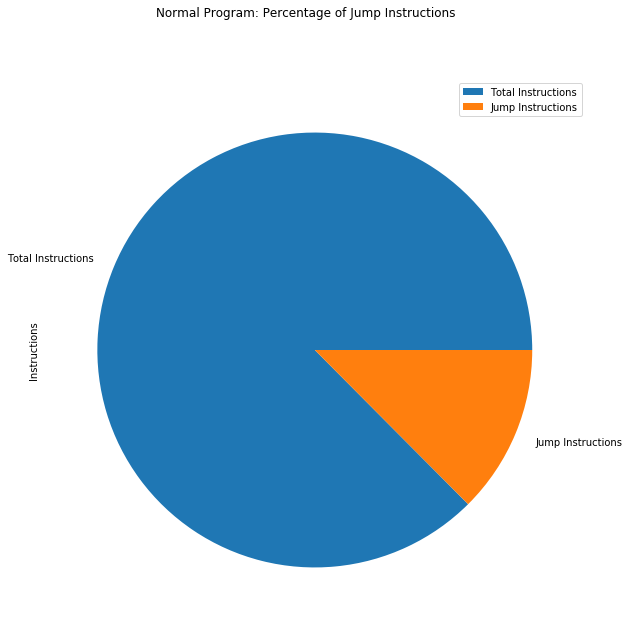

In [31]:
instructions = {"Instructions": [norm_func.instruction_count.sum(), # - norm_func.jump_count.sum()
                                 norm_func.jump_count.sum()]}
                                 
frame = pd.DataFrame(instructions, index=["Total Instructions", "Jump Instructions"])
plt = frame.plot(kind="pie", 
                 subplots=True, 
                 title="Normal Program: Percentage of Jump Instructions",
                 figsize=(10, 10))

In [110]:
print(f"Obfuscated Program\n\nTotal Instructions: {obf_func.instruction_count.sum()}\n\
Jump Instructions:{obf_func.jump_count.sum()}\n\
Percent: {round(100*(obf_func.jump_count.sum() / obf_func.instruction_count.sum()), 2)}%")
obf_func.instruction_count

Obfuscated Program

Total Instructions: 1271
Jump Instructions:285
Percent: 22.42%


0     168
1     120
2     106
3     106
4      69
5     137
6      23
7     163
8      60
9     159
10     71
11     53
12     36
Name: instruction_count, dtype: int64

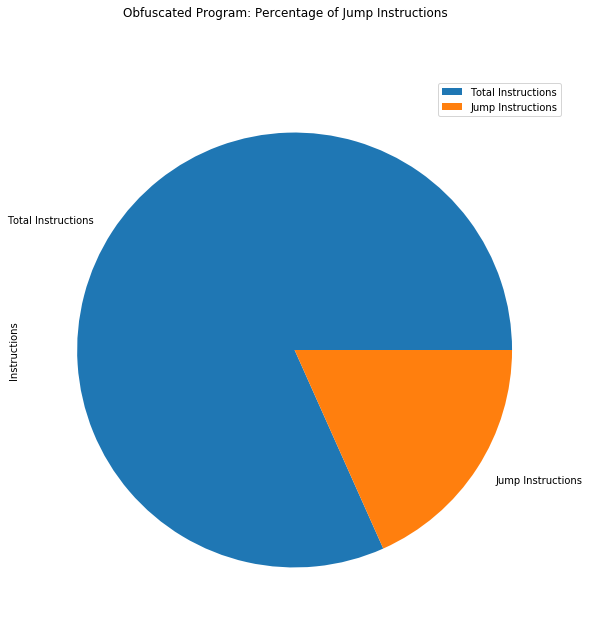

In [50]:
instructions = {"Instructions": [obf_func.instruction_count.sum(), # - norm_func.jump_count.sum()
                                 obf_func.jump_count.sum()]}
                                 
frame = pd.DataFrame(instructions, index=["Total Instructions", "Jump Instructions"])
plt = frame.plot(kind="pie", 
                 subplots=True, 
                 title="Obfuscated Program: Percentage of Jump Instructions",
                 figsize=(10, 10))

In [112]:
top_10 = norm_inst.groupby("name").size()\
                                  .sort_values(ascending=False)\
                                  .head(10)

print(f"Top 10 Instructions\nNormal Program\n\n{top_10}")

Top 10 Instructions
Normal Program

name
mov       192
movslq     37
jmpq       32
callq      23
add        21
movl       20
cmp        19
sub        15
push       13
pop        13
dtype: int64


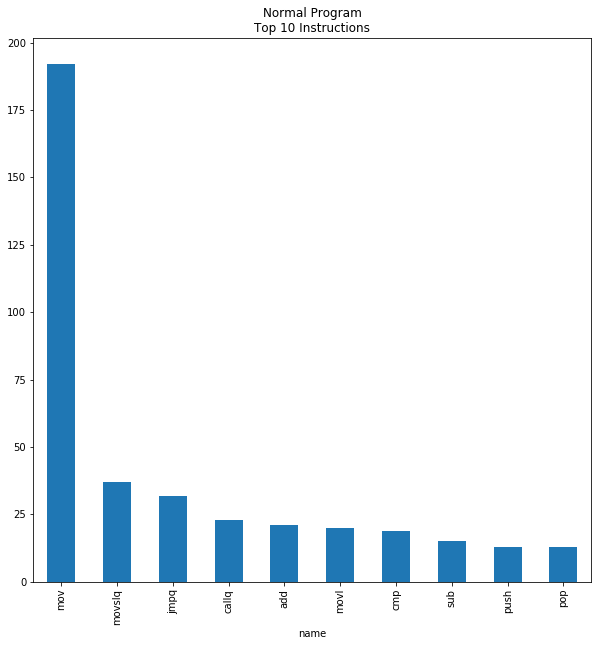

In [95]:
fig = top_10.plot(kind="bar",
             title=f"Normal Program\nTop 10 Instructions",
             figsize=(10, 10))

In [113]:
top_10 = obf_inst.groupby("name").size()\
                                  .sort_values(ascending=False)\
                                  .head(10)

print(f"Top 10 Instructions\nObfuscated Program\n\n{top_10}")

Top 10 Instructions
Obfuscated Program

name
mov       683
jmpq      244
add        50
movslq     37
shl        32
cmp        26
callq      23
movl       20
sub        15
je         14
dtype: int64


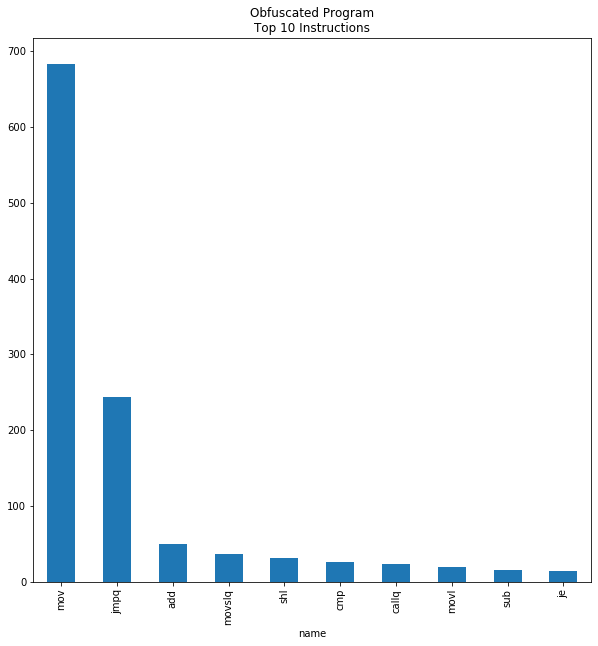

In [97]:
fig = top_10.plot(kind="bar",
             title=f"Obfuscated Program\nTop 10 Instructions",
             figsize=(10, 10))